In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
tragitti = pd.read_csv('csv/alldata_cleared.csv', index_col=False)
len(tragitti)

105150

In [3]:
tragitti = tragitti.sample(50000)
tragitti.head()

,Lat,Lon,Elat,Elon,ADistance,FDistance,Year,Month,Day,Hour,...,Second,Public,Public2,Bike,Foot,Car,Car2Go,Enjoy,Car2GoFreeCars,EnjoyFreeCars
26256,45.451169,9.220028,45.453870,9.161717,4.558133,5.1672,2020,4,8,10,...,17,50,0,23,69,13,16,0,1514,635
52675,45.479700,9.159077,45.466986,9.179549,2.132218,2.5197,2020,5,4,10,...,16,15,0,12,34,7,7,7,936,608
7550,45.457049,9.185445,45.444158,9.165472,2.116990,2.6926,2020,3,20,7,...,30,23,0,16,36,10,18,10,1149,774
92896,45.476706,9.201405,45.500722,9.191420,2.781447,3.5408,2020,6,21,7,...,6,30,0,17,47,9,15,19,936,888
86240,45.497865,9.193894,45.474635,9.193908,2.582934,3.0394,2020,6,13,17,...,2,19,0,16,41,10,17,15,936,757


In [4]:
# Massima e minimia distanza di un tragitto (FDistance e' la lunghezza in km del tragitto a piedi)
min = tragitti['FDistance'].min()
max = tragitti['FDistance'].max()
print(min, max) # km

(2.1412, 10.977600000000001)


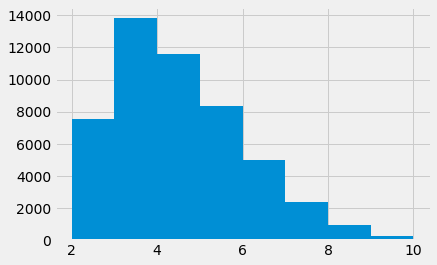

In [5]:
# Distribuzione in base alla lunghezza delle tratte
tragitti['FDistance'].hist(bins=np.hstack((np.arange(int(min), int(max+1), 1))))
plt.show()

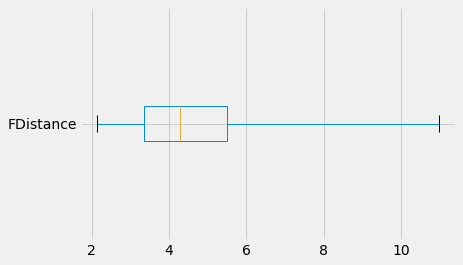

In [6]:
tragitti['FDistance'].plot.box(vert=False, whis='range')
plt.show()

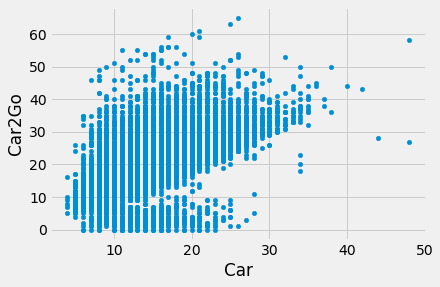

In [7]:
# Correlazione tra tragitto in macchina propria (macchina) e car sharing (piedi + macchina)
tragitti.plot.scatter('Car', 'Car2Go')
plt.show()

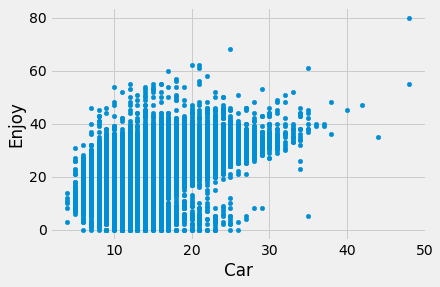

In [8]:
tragitti.plot.scatter('Car', 'Enjoy')
plt.show()

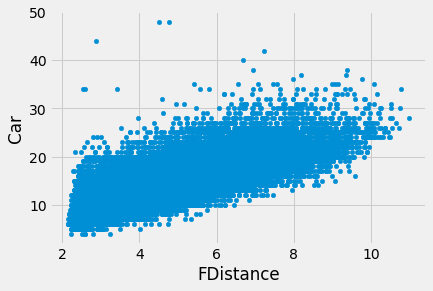

In [9]:
# Correlazione tra lunghezza tragitto e tempo di percorrenza coi vari mezzi
tragitti.plot.scatter('FDistance', 'Car')
plt.show()

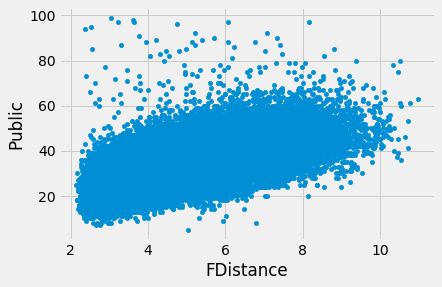

In [10]:
tragitti[tragitti['Public'] < 100].plot.scatter('FDistance', 'Public')
plt.show()

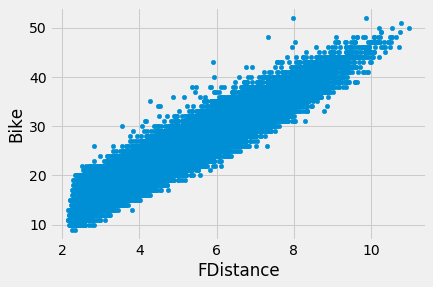

In [11]:
tragitti.plot.scatter('FDistance', 'Bike')
plt.show()

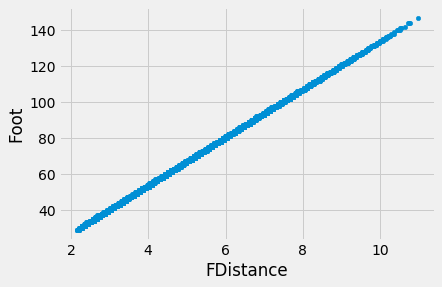

In [12]:
tragitti.plot.scatter('FDistance', 'Foot')
plt.show()

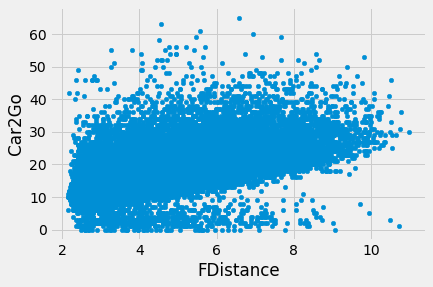

In [13]:
tragitti.plot.scatter('FDistance', 'Car2Go')
plt.show()

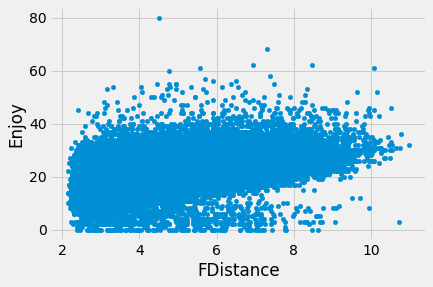

In [14]:
tragitti.plot.scatter('FDistance', 'Enjoy')
plt.show()

In [15]:
# Velocita' media durante il giorno
def vmedia_giorno(tragitti, mezzo, mese, giorno):
    ore = range(7, 24)
    media_giorno = []
    for ora in ore:
        tragitti_fascia_oraria = tragitti[(tragitti['Hour'] == ora) & (tragitti['Month'] == 3) & (tragitti['Day'] < 15)]
        media = (tragitti_fascia_oraria['FDistance'] * 60.) / tragitti_fascia_oraria[mezzo]
        media_giorno.append(media.mean())
    return media_giorno

vmedia_giorno(tragitti, 'Car', 3, 15)

[16.683861803462925,
 14.304105619522952,
 14.091702014174162,
 15.226373787481634,
 17.481876592581187,
 16.646501466328928,
 17.022974556262305,
 19.020124958847916,
 18.156809741226589,
 16.426140101429844,
 15.995988984023434,
 14.064091593526765,
 15.208372924357596,
 19.168821153481971,
 18.998302652407695,
 20.341929928013688,
 21.286046728165271]

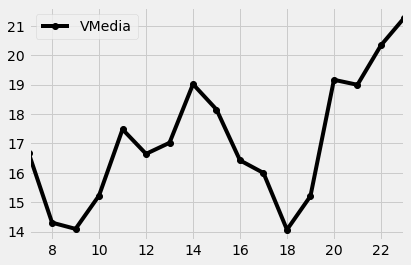

In [16]:
# x = ora del giorno, y = velocita' media
df = pd.DataFrame(vmedia_giorno(tragitti, 'Car', 3, 15), index=range(7, 24), columns=['VMedia'])
df.plot(marker='o', color='black')
plt.show()

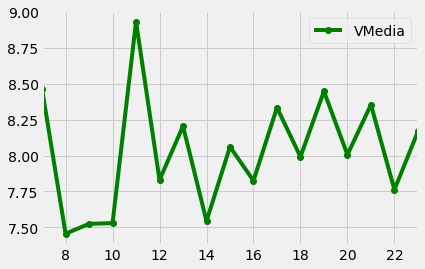

In [17]:
df = pd.DataFrame(vmedia_giorno(tragitti, 'Public', 3, 15), index=range(7, 24), columns=['VMedia'])
df.plot(marker='o', color='green')
plt.show()